In [1]:
import pandas as pd
import bz2
from sklearn.metrics import f1_score,classification_report
from sklearn.neural_network import MLPClassifier



In [2]:
from data_getter import *

30220 summaries containing 'No summary available'
6142 summaries containing 'Full story available on'
Duplicate summaries removed: 14242
Duplicate headlines removed: 404
randomizing order of data


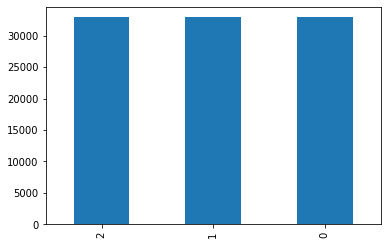

In [3]:
balanced_dataset['priceChangeClass'].value_counts().plot(kind='bar');

In [4]:
balanced_dataset['priceChangeClass'].value_counts()

2    32900
1    32900
0    32900
Name: priceChangeClass, dtype: int64

## Naive Bayes classifier¶

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
steps= [('vec', CountVectorizer()), ('multinomialnb', MultinomialNB())]
pipeline = Pipeline(steps)
pipeline.fit(train_data.summary, train_data.priceChangeClass)

Pipeline(steps=[('vec', CountVectorizer()), ('multinomialnb', MultinomialNB())])

In [7]:
pipeline.score(test_data.summary, test_data.priceChangeClass)

0.43465045592705165

In [8]:
steps= [('vec', TfidfVectorizer()), ('multinomialnb', MultinomialNB())]
pipeline2 = Pipeline(steps)
pipeline2.fit(train_data.summary, train_data.priceChangeClass)

Pipeline(steps=[('vec', TfidfVectorizer()), ('multinomialnb', MultinomialNB())])

In [24]:
pipeline2.score(test_data.summary, test_data.priceChangeClass)

0.4371833839918946

              precision    recall  f1-score   support

           0      0.417     0.431     0.424      5914
           1      0.464     0.488     0.476      5917
           2      0.421     0.385     0.402      5935

    accuracy                          0.435     17766
   macro avg      0.434     0.435     0.434     17766
weighted avg      0.434     0.435     0.434     17766



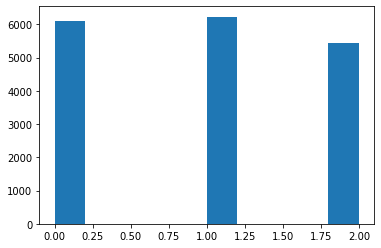

In [44]:
from sklearn.metrics import f1_score,classification_report


predicted = pipeline.predict(test_data.summary)
plt.hist(predicted)

print(classification_report(test_data.priceChangeClass, predicted, digits=3))


In [50]:
from data_analyser import calc_rate_of_return

In [51]:
rate_return = calc_rate_of_return(predicted, test_data["1stepChange"].tolist(), buy_class=2)

In [52]:
np.mean(rate_return)

1.0034550017223098

In [53]:
np.mean(test_data["1stepChange"].tolist())

1.0001833401770026

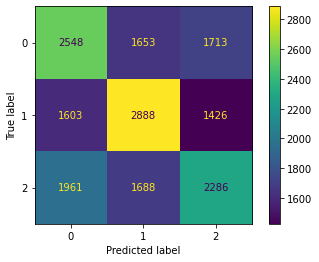

In [54]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(pipeline, test_data.summary, test_data.priceChangeClass)


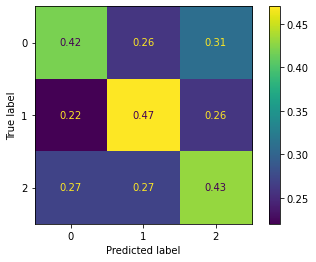

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
disp = ConfusionMatrixDisplay(np.array([[0.42,0.26,0.31],[0.22,0.47,0.26],[0.27,0.27,0.43]]))
disp.plot()

## Baseline

In [21]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_data.summary, train_data.priceChangeClass)
dummy_clf.score(test_data.summary, test_data.priceChangeClass)

0.331306990881459

              precision    recall  f1-score   support

           0      0.329     0.330     0.330      5914
           1      0.328     0.330     0.329      5917
           2      0.333     0.330     0.332      5935

    accuracy                          0.330     17766
   macro avg      0.330     0.330     0.330     17766
weighted avg      0.330     0.330     0.330     17766



1.0002514470783213

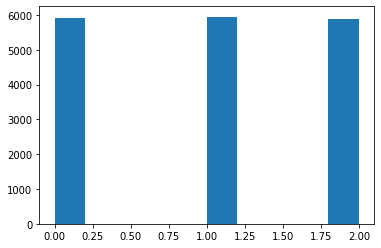

In [23]:
predicted = dummy_clf.predict(test_data.summary)
plt.hist(predicted)

print(classification_report(test_data.priceChangeClass, predicted, digits=3))

rate_return = calc_rate_of_return(predicted, test_data["1stepChange"].tolist(), buy_class=2)
np.mean(rate_return)

An even dumber baseline is to predict, for every document, that class which appears most often in the training data. This baseline is also called the most frequent class baseline. What is the accuracy of that baseline on the test data?